In [62]:
import pandas as pd 
import numpy as np

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt


In [64]:
df=pd.read_csv("TimeSeriesDatasetModified.csv")
df.head()


,Date,bdl_Open,bdl_High,bdl_Low,bdl_Close,bdl_Adj Close,bdl_Volume,hal_Open,hal_High,hal_Low,...,hal_Volume,zentec_Open,zentec_High,zentec_Low,zentec_Close,zentec_Adj Close,zentec_Volume,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,02-04-2018,399.000000,402.000000,386.250000,390.750000,348.683014,486346.0,1127.699951,1155.000000,1100.050049,...,463619.0,115.000000,121.949997,113.849998,118.800003,117.198601,680990.0,NaN,NaN,NaN
1,09-04-2018,392.000000,393.000000,372.299988,375.700012,335.253265,338510.0,1100.500000,1150.000000,1080.099976,...,352724.0,118.599998,127.900002,117.050003,123.849998,122.180527,1132548.0,NaN,NaN,NaN
2,16-04-2018,373.000000,421.899994,373.000000,415.600006,370.857788,1818906.0,1125.000000,1164.000000,1118.000000,...,324581.0,121.500000,128.800003,118.800003,122.849998,121.194008,940794.0,NaN,NaN,NaN
3,23-04-2018,415.799988,421.000000,403.000000,405.000000,361.398956,358349.0,1132.000000,1149.000000,1122.000000,...,137822.0,121.599998,131.399994,120.000000,121.849998,120.207481,1073345.0,NaN,NaN,NaN
4,30-04-2018,400.549988,411.399994,386.350006,388.850006,346.987610,172209.0,1134.400024,1134.400024,1089.199951,...,68802.0,122.900002,124.349998,113.199997,115.599998,114.041733,443155.0,NaN,NaN,NaN


In [71]:

df.isnull().sum()

Date                  3
bdl_Open              3
bdl_High              3
bdl_Low               3
bdl_Close             3
bdl_Adj Close         3
bdl_Volume            3
hal_Open              3
hal_High              3
hal_Low               3
hal_Close             3
hal_Adj Close         3
hal_Volume            3
zentec_Open           3
zentec_High           3
zentec_Low            3
zentec_Close          3
zentec_Adj Close      3
zentec_Volume         3
Unnamed: 19         256
Unnamed: 20         256
Unnamed: 21         255
dtype: int64

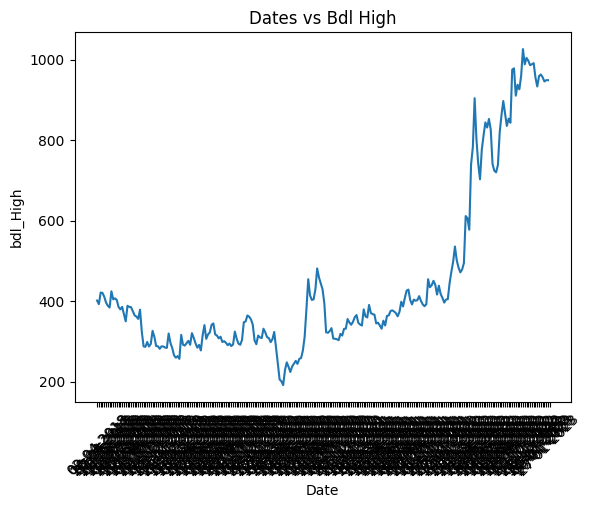

In [76]:
import matplotlib.pyplot as plt
x=df['Date'].tolist()
y=df['bdl_High'].tolist()
#
# Swap x and y data (assuming dates are on the y-axis)
plt.plot(x,y)  # bdl_high on x, dates on y

# Add labels and title (adjust based on your data)
plt.xlabel("Date")
plt.ylabel("bdl_High")
plt.title("Dates vs Bdl High")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)  # Uncomment this line if x-axis labels are overlapping

# Show the plot
plt.show()


['02-04-2018', '09-04-2018', '16-04-2018', '23-04-2018', '30-04-2018', '07-05-2018', '14-05-2018', '21-05-2018', '28-05-2018', '04-06-2018', '11-06-2018', '18-06-2018', '25-06-2018', '02-07-2018', '09-07-2018', '16-07-2018', '23-07-2018', '30-07-2018', '06-08-2018', '13-08-2018', '20-08-2018', '27-08-2018', '03-09-2018', '10-09-2018', '17-09-2018', '24-09-2018', '01-10-2018', '08-10-2018', '15-10-2018', '22-10-2018', '29-10-2018', '05-11-2018', '12-11-2018', '19-11-2018', '26-11-2018', '03-12-2018', '10-12-2018', '17-12-2018', '24-12-2018', '31-12-2018', '07-01-2019', '14-01-2019', '21-01-2019', '28-01-2019', '04-02-2019', '11-02-2019', '18-02-2019', '25-02-2019', '04-03-2019', '11-03-2019', '18-03-2019', '25-03-2019', '01-04-2019', '08-04-2019', '15-04-2019', '22-04-2019', '29-04-2019', '06-05-2019', '13-05-2019', '20-05-2019', '27-05-2019', '03-06-2019', '10-06-2019', '17-06-2019', '24-06-2019', '01-07-2019', '08-07-2019', '15-07-2019', '22-07-2019', '29-07-2019', '05-08-2019', '12-0